In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
names = ['sepal-length','sepal-width','petal-length','petal-width'];
data = load_iris()

dataset=pd.DataFrame(data=data.data,columns=names)
dataset['class']=data.target
print(dataset.head());




   sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

array = dataset.values;
X = array[:,0:4];
Y = array[:,4];
t_size = 0.25;

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t_size);

knn = KNeighborsClassifier(n_neighbors=40);
knn.fit(X_train,Y_train);

predictions = knn.predict(X_test);

print(accuracy_score(Y_test,predictions));
print(confusion_matrix(Y_test,predictions));
print(classification_report(Y_test,predictions));

print(dataset.shape);

#KNN doesn't always perform well with high-dimensionality or categorical features.

 

0.9736842105263158
[[14  0  0]
 [ 0 12  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

(150, 5)


0.07894736842105263
0.07894736842105263
0.07894736842105263
0.05263157894736842
0.07894736842105263
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.05263157894736842
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.07894736842105263
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842
0.05263157894736842


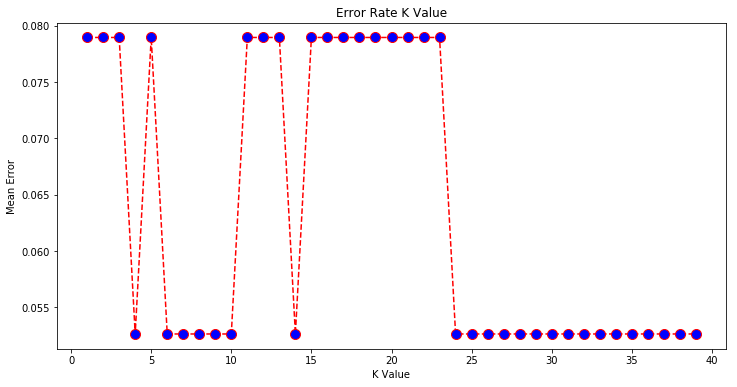

In [5]:
error = []

import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    print(np.mean(pred_i != Y_test))
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

In [34]:
predicted= knn.predict(X_test) 
print ("Predicted Values:", predicted)

Predicted Values: [2. 0. 0. 1. 0. 1. 2. 1. 0. 1. 1. 1. 2. 2. 1. 1. 0. 1. 0. 2. 2. 2. 2. 0.
 1. 0. 1. 2. 1. 2. 0. 0. 0. 2. 0. 0. 2. 0.]
